# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [29]:
data = pd.read_csv('data_SARS-CoV-2_TestMetadata_with_viral.csv')

In [30]:
# iterating the columns 
for col in data.columns: 
    print(col) 

record_date
virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_info
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
originating_lab_address
sample_id_given_by_sample_provider
submitting_lab
submitting_lab_address
sample_id_given_by_submitting_lab
authors
submitter
submission_date
submitter_address
Query
Strand
%N
Length(nt)
Length(aa)
#Muts
%Muts
#UniqueMuts
%UniqueMuts
#ExistingMuts
%ExistingMuts
Comment
Symbol
Reference
UniqueMutList
ExistingMutList
Clade
IfExistSpecialChar


# Preprocessing and cleaning the data

In [31]:
#important features
#important features
start_data_row = 0
Final_data_row = 255
Data = data.loc[ start_data_row:Final_data_row , ['location','gender','age','status']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [32]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)

In [33]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)
Data.index = range(len(Data))

In [34]:
#organizing the location based on the continent and country (For USA: continent,country, and state )
Location = Data.location.str.split('/')
listToStr_location = list()
for i in range(len(Location)):  
    if Location[i][1:2][0]!=' USA ':
        Location[i] = Location[i][0:2]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
    else:
        Location[i] = Location[i][0:3]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
listToStr_location

['Oceania   Australia ',
 'Oceania   Australia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Asia   China ',
 'Europe   Russia ',
 'Asia   China ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Ecuador ',
 'Central America   Costa Rica',
 'Central America   Costa Rica',
 'Central America   Costa Rica',
 'Oceania   New Zealand ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   Thailand ',
 'Asia   Thailand ',
 'Nort

In [35]:
Data.location =listToStr_location
Data.groupby('location')
Data

,location,gender,age,status
0,Oceania Australia,male,53,Recovered
1,Oceania Australia,Female,21,Recovered
2,Asia Georgia,Female,"31, 6 month",Hospitalized
3,Asia Georgia,Male,"59, 1 months",Hospitalized
4,Asia Georgia,Male,33.5,Hospitalized
...,...,...,...,...
199,North America USA Puerto Rico,unknown,unknown,Asymptomatic
200,Africa Nigeria,Female,30,Not Hospitalized
201,Oceania Guam,Male,62,Outpatient
202,Asia India,Female,63,Mild


In [36]:
#replacing the age that were in months to year
Data['age'] = Data['age'].str.replace('months','')
Data['age'] = Data['age'].str.replace('month','')

for i in range(1,len(Data)):
    index_1 = Data.age[i].find(',') 
    index_2 = Data.age[i].find('-') 
    index_3 = Data.age[i].find('unknown') 
    if index_1!=-1:
        Data.age[i] = Data.age[i][:index_1]
        Data.age[i] = int(float(Data.age[i])/12)
    if index_2!=-1:
        Data.age[i] = int((float(Data.age[i][index_2+1:])+float(Data.age[i][:index_2]))/2)
    if index_3!=-1:
        Data.age[i] = 'NaN'


In [37]:
#deleting the >, 's and s from age
Data['age'] = Data['age'].str.replace('>','')
Data['age'] = Data['age'].str.replace('s','')
Data['age'] = Data['age'].str.replace("'",'')

In [38]:
Data.replace(['female','Female'],value= ['Female','Female'], inplace=True)
Data.replace(['male','Male'],value= ['Male','Male'], inplace=True)        

In [39]:
#the unknown gender is set to missing category
for i in range(1,len(Data)):
    index_4 = Data.gender[i].find('unknown') 
    if index_4!=-1:
        Data.gender[i] = 'missing'


In [40]:
#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

In [41]:
#Finding unknown data
Data.loc[Data['gender']=='unknown']

,location,gender,age,status


In [42]:
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['location']]),pd.get_dummies(Data[['gender']]), Data[['age','status']]], axis=1)
Data_model.head()

,location_Africa Egypt,location_Africa Nigeria,location_Asia Bangladesh,location_Asia China,location_Asia Georgia,location_Asia Hong Kong,location_Asia India,location_Asia Iran,location_Asia Israel,location_Asia Japan,...,location_Oceania New Zealand,location_South America Brazil,location_South America Colombia,location_South America Ecuador,location_South America Uruguay,gender_Female,gender_Male,gender_missing,age,status
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,53,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,21,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,NaN,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,33.5,0


In [43]:
#checking the balance in the data
Data_model['status'].value_counts()

0    172
1     32
Name: status, dtype: int64

# Logistic regression model

In [44]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()


0    172
1     32
Name: status, dtype: int64

In [45]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

### Imputing the unknown data using KNN

In [46]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(X_train[['age']])
X_train['age']=imputer.transform(X_train[['age']])
X_test['age']=imputer.transform(X_test[['age']])

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Dimension reduction using PCA

#### from sklearn.decomposition import PCA, KernelPCA
pca = PCA()
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### Balancing the data

In [47]:
#balancing the data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)


C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Scaling the data

In [48]:
#Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [49]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', penalty='l2',C= 1, max_iter=200, n_jobs=1, tol=0.0001)
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

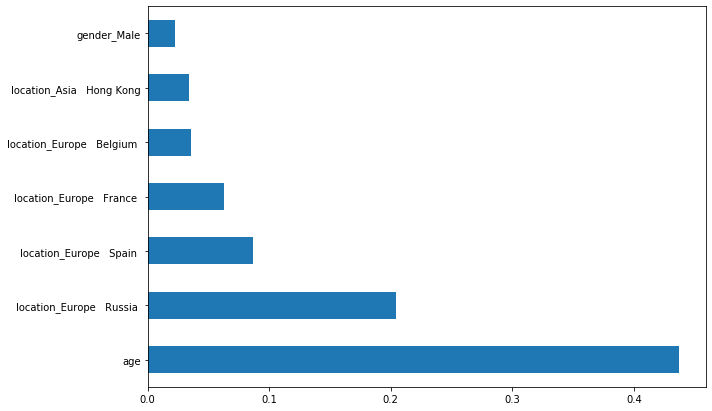

In [27]:
from sklearn.ensemble import  RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(X_train, y_train)

# predict the target on train and test data
predict_train = model_RFR.predict(X_train)
predict_test = model_RFR.predict(X_test)
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X.columns)
feat_importances.nlargest(7).plot(kind='barh');

Feature: 0, Score: -0.11976
Feature: 1, Score: -0.15185
Feature: 2, Score: -0.47978
Feature: 3, Score: -0.84129
Feature: 4, Score: -0.28564
Feature: 5, Score: -0.62535
Feature: 6, Score: -0.11150
Feature: 7, Score: -0.23551
Feature: 8, Score: -0.53965
Feature: 9, Score: -0.48178
Feature: 10, Score: -0.27316
Feature: 11, Score: 0.00000
Feature: 12, Score: -0.21489
Feature: 13, Score: -0.25529
Feature: 14, Score: -0.24943
Feature: 15, Score: -0.20813
Feature: 16, Score: 0.41065
Feature: 17, Score: 1.44337
Feature: 18, Score: 0.82827
Feature: 19, Score: -0.25640
Feature: 20, Score: -0.25573
Feature: 21, Score: -0.94168
Feature: 22, Score: -0.35499
Feature: 23, Score: -0.35036
Feature: 24, Score: 1.05009
Feature: 25, Score: 0.41909
Feature: 26, Score: 0.57651
Feature: 27, Score: -0.15602
Feature: 28, Score: -0.22856
Feature: 29, Score: -0.14043
Feature: 30, Score: -0.55375
Feature: 31, Score: -0.37037
Feature: 32, Score: 0.00000
Feature: 33, Score: -0.21721
Feature: 34, Score: -0.53017
Fea

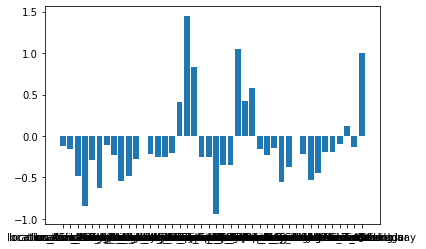

In [52]:
## Regression feature importance
import matplotlib.pyplot as plt
# get feature importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
plt.bar(X.columns, importance)
plt.show()

In [50]:
#prediction results
y_hat = model.predict(X_test)
lr_probs = model.predict_proba(X_test)
#Return the mean accuracy on the given test data and taraining data to see if we have overfitting.score clculates R^2
print('R^2 _train=',model.score(X_train, y_train))
print('R^2 _test=',model.score(X_test, y_test))

R^2 _train= 0.9343065693430657
R^2 _test= 0.975609756097561


### Cross validation 

In [51]:
#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print('CV-scores_min = ',scores.min())
print('CV_scores_mean =', scores.mean())
print('CV_scores_max =', scores.max())

Cross-Validation Accuracy Scores [0.92857143 0.92857143 0.92857143 0.92857143 0.88888889 0.96296296
 0.96296296 0.92592593 0.88888889 0.88888889]
CV-scores_min =  0.8888888888888888
CV_scores_mean = 0.9232804232804233
CV_scores_max = 0.9629629629629629


In [52]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df.head(25)

,Actual,Predicted
135,0,0
42,0,0
45,0,0
90,0,0
116,0,0
83,0,0
126,0,0
123,0,0
190,0,0
143,1,1


### Performance measurement metrics

In [53]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Mean Absolute Error: 0.024390243902439025
Mean Squared Error: 0.024390243902439025
Root Mean Squared Error: 0.15617376188860607


In [54]:
from sklearn.metrics import precision_recall_curve
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_hat)

In [55]:
from sklearn.metrics import f1_score
# calculate F1 score
f1 = f1_score(y_test, y_hat)
print('f1 score =', f1)

f1 score = 0.9090909090909091


In [56]:
#Area Under ROC Curve (AUROC) metric
from sklearn.metrics import roc_auc_score
lr_probs = model.predict_proba(X_test)
# Keep only the positive class
#lr_probs = [p[1] for p in lr_probs]
lr_probs
print( 'roc_auc =', roc_auc_score(y_test, lr_probs[:,1]) )

roc_auc = 0.9666666666666666


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.967


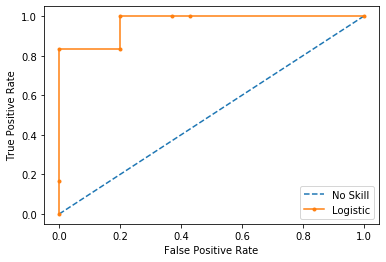

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.909 auc=0.907


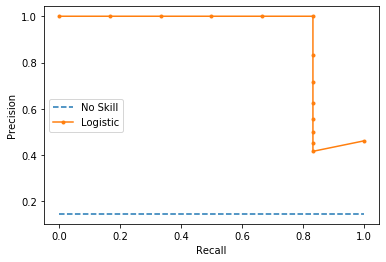

In [58]:
from sklearn.metrics import auc
lr_probs = model.predict_proba(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs[:,1])
lr_f1, lr_auc = f1_score(y_test, y_hat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()